# Predict A Doctor's Consultation Fee 

# key_Reason to predict the doctor Consultation Fee
We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.?

# Feature detail:

In [1]:
#importing all the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading train and test data
test= pd.read_csv('doctor_consult_test.csv')
train= pd.read_excel('Final_train.xlsx')

In [3]:
#seeing first five row of train data
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
#seeing first five row of train data
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
#lets check the shape of train and test data
print(train.shape)
print()
print(test.shape)

(5961, 7)

(1987, 6)


# Train Data

In [6]:
#lets check the columns first
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [7]:
#lets check the data types
train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [8]:
#lets check the null value present in our data set
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [9]:
#lets drop Miscellaneous_Info
train.drop(columns='Miscellaneous_Info',inplace=True)
train
# below we can observe Miscellaneous_Info is dropped.

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [10]:
#lets fill the null value with the most frequent value
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
col=['Rating','Place']
for i in col:
    train[i]=imp.fit_transform(train[i].values.reshape(-1,1))
#lets check the null value again
train.isnull().sum()
# we can observe there is no null value present in the dataset

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

In [11]:
#lets check the information about the train datasets.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   object
 2   Rating         5961 non-null   object
 3   Place          5961 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 279.5+ KB


# summay statistics

In [12]:
train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


# Exploring Ctagorical columns

In [13]:
#lets see the object data type columns and see thier unique values.
for column in train.columns:
    if train[column].dtypes == 'object':
        print(str(column)+  '  :  ' +str(train[column].unique()))
        print(train[column].value_counts())
        print('*****************************************************************************************')
        print('\n')

Qualification  :  ['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                                                              488
BHMS                                                                                                             477
BAMS                                                                                                             471
MBBS                                                                                                             334
MBBS, MS - ENT                                                                                                   220
                                                       

# Exploratory Data Analysis

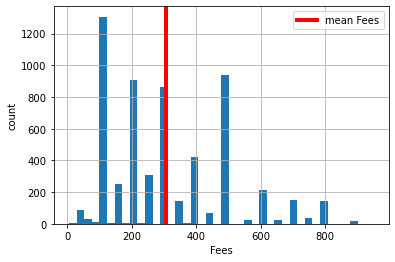

In [14]:
# lets check the mean fees
Fees = train['Fees'].hist(bins=40)
mean_val= np.mean(train['Fees'])
plt.axvline(mean_val,linewidth=4, color='red', label='mean Fees')
plt.xlabel('Fees')
plt.ylabel('count')
plt.legend()
plt.show()

In [15]:
#before mving further lets explore column and try to delete the alphabetical value.
#lets delete the alpha value from experience column and make the dtype int.
train['Experience'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
train['Experience'] = train['Experience'].astype('int')
#lets delete the alpha value from experience column and make the dtype int.
train['Rating'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
train['Rating'] = train['Rating'].astype('int')

# univariate analysis

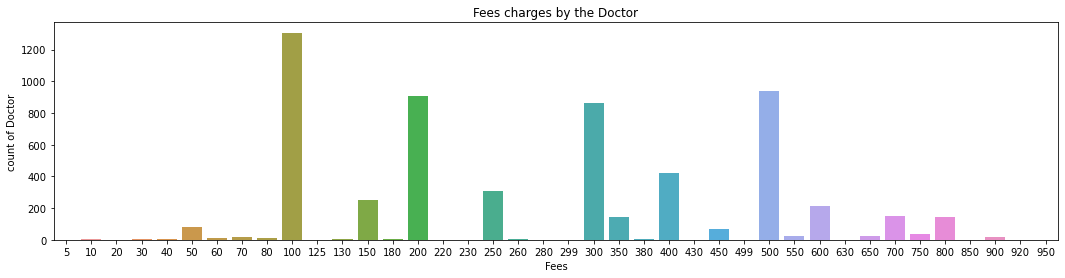

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64

In [16]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Fees',data=train)
plt.title('Fees charges by the Doctor')
plt.xlabel('Fees')
plt.ylabel('count of Doctor')
plt.show()
train['Fees'].value_counts()

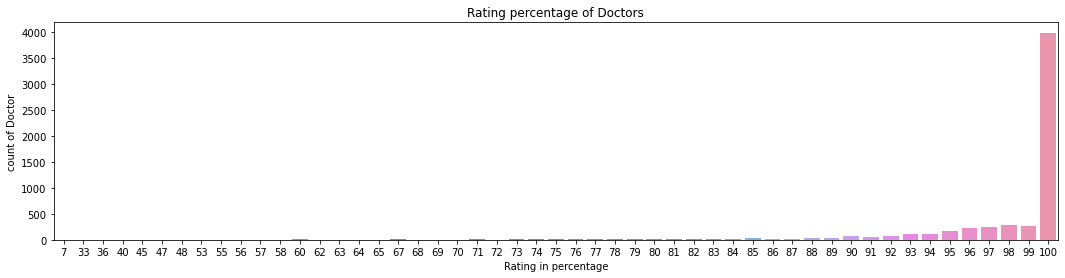

In [17]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Rating',data=train)
plt.title('Rating percentage of Doctors')
plt.xlabel('Rating in percentage')
plt.ylabel('count of Doctor')
plt.show()

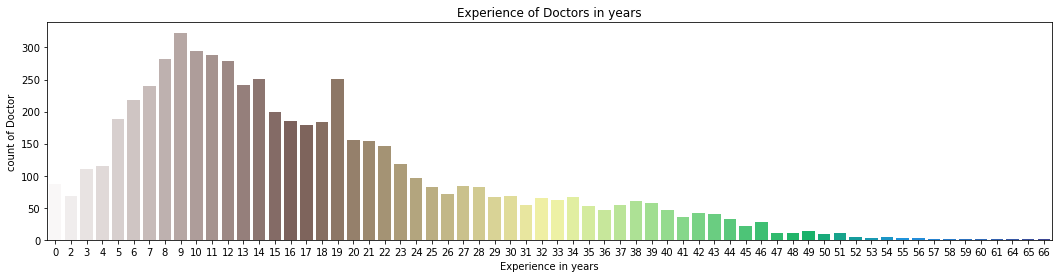

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64

In [18]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Experience',data=train,palette='terrain_r')
plt.title('Experience of Doctors in years')
plt.xlabel('Experience in years')
plt.ylabel('count of Doctor')
plt.show()
train['Experience'].value_counts()

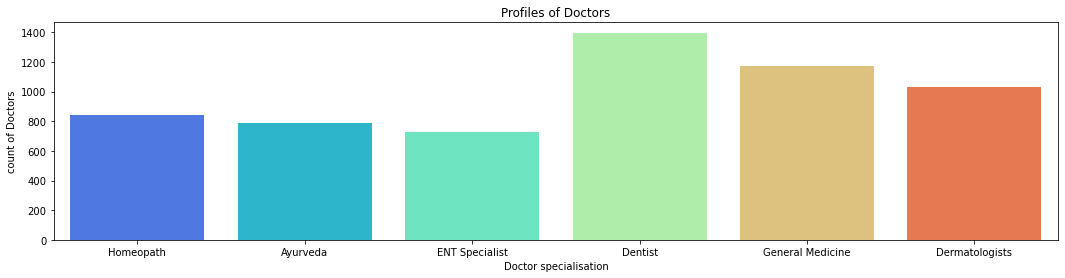

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [19]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Profile',data=train,palette='rainbow')
plt.title('Profiles of Doctors')
plt.xlabel('Doctor specialisation')
plt.ylabel('count of Doctors')
plt.show()
train['Profile'].value_counts()

# Bivariate analysis

# Fees vs Profile

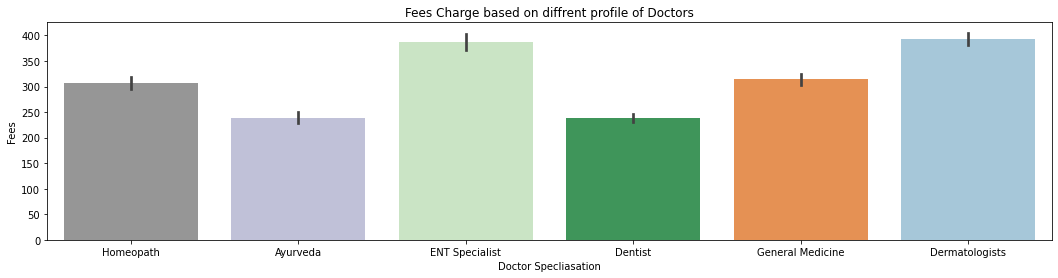

In [20]:
plt.subplots(figsize=(18,4))
sns.barplot(x='Profile',y='Fees',data=train,palette='tab20c_r')
plt.title('Fees Charge based on diffrent profile of Doctors')
plt.xlabel('Doctor Specliasation')
plt.ylabel('Fees')
plt.show()

# Fees vs Experience

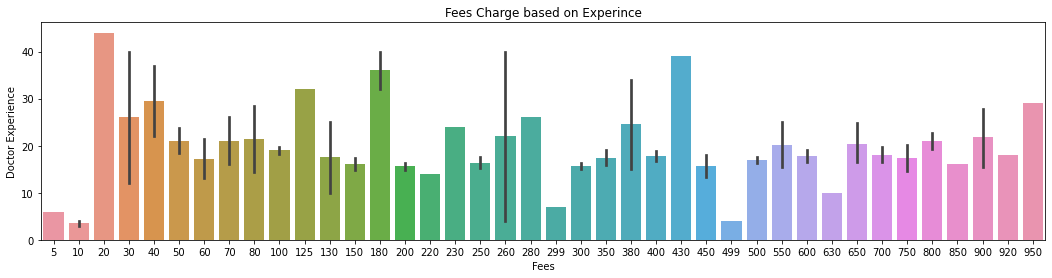

In [21]:
plt.subplots(figsize=(18,4))
sns.barplot(x='Fees',y='Experience',data=train)
plt.title('Fees Charge based on Experince')
plt.xlabel('Fees')
plt.ylabel('Doctor Experience')
plt.show()

# Fees vs Rating

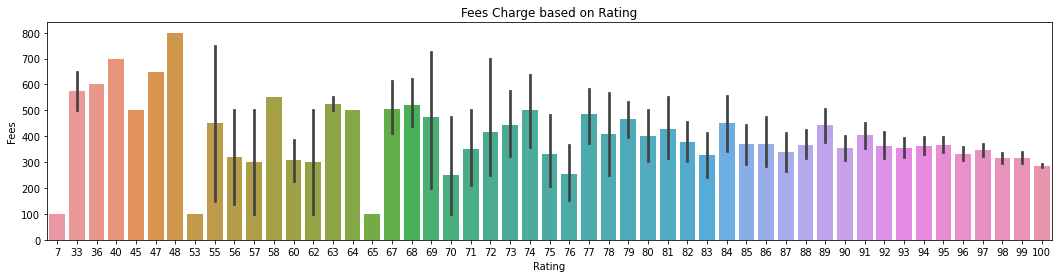

In [22]:
plt.subplots(figsize=(18,4))
sns.barplot(x='Rating',y='Fees',data=train)
plt.title('Fees Charge based on Rating')
plt.xlabel('Rating')
plt.ylabel('Fees')
plt.show()

# Profile vs experience

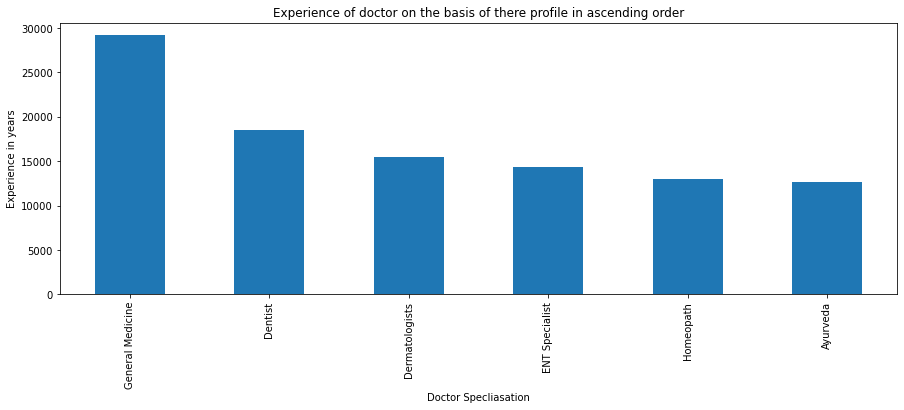

In [23]:
plt.subplots(figsize=(18,4))
train.groupby('Profile')['Experience'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Experience of doctor on the basis of there profile in ascending order')
plt.xlabel('Doctor Specliasation')
plt.ylabel('Experience in years')
plt.show()

# Profile vs Fees in ascending order

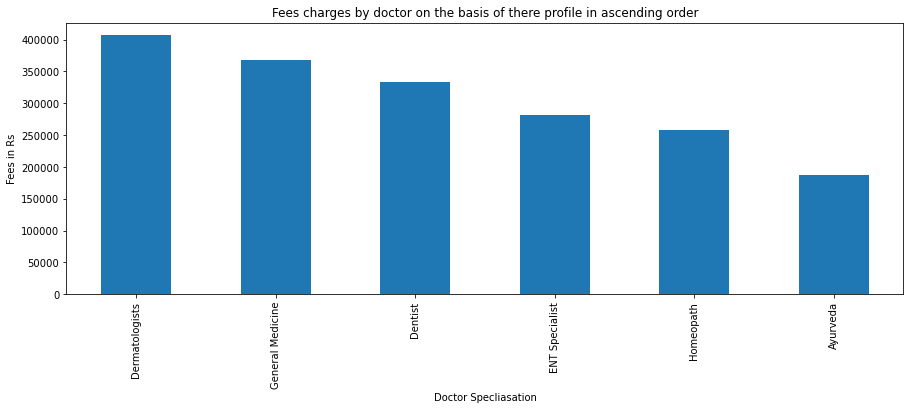

In [24]:
plt.subplots(figsize=(18,4))
train.groupby('Profile')['Fees'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Fees charges by doctor on the basis of there profile in ascending order')
plt.xlabel('Doctor Specliasation')
plt.ylabel('Fees in Rs')
plt.show()

# Profile vs Rating in ascending order

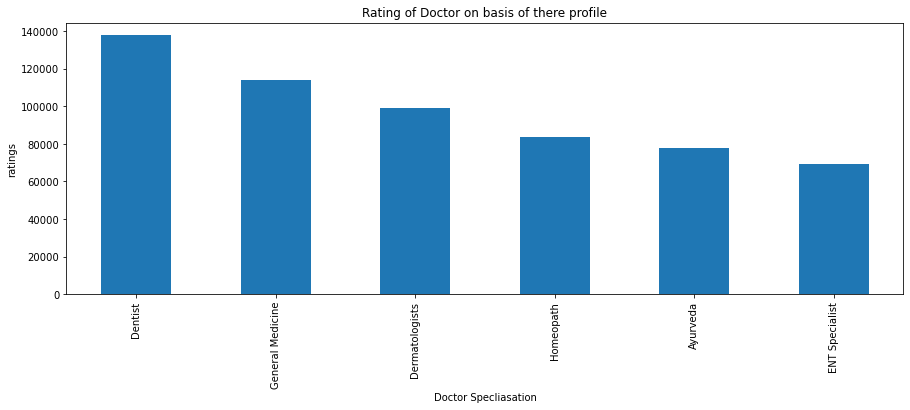

In [25]:
plt.subplots(figsize=(18,4))
train.groupby('Profile')['Rating'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Rating of Doctor on basis of there profile')
plt.xlabel('Doctor Specliasation')
plt.ylabel('ratings')
plt.show()

# Multivariate Analysis



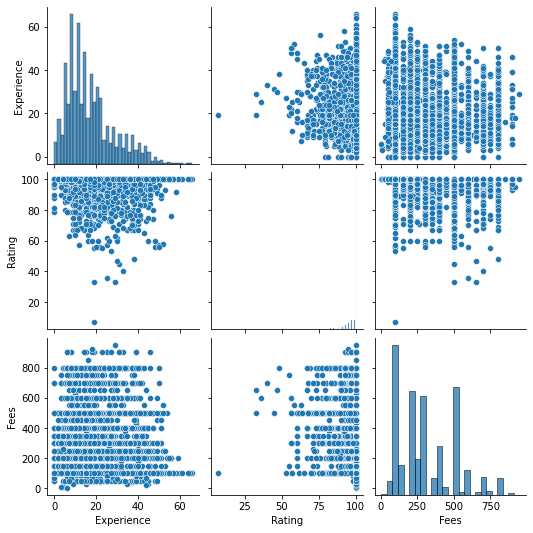

In [26]:
sns.pairplot(train)

In [27]:
#lets drop Qualification and Place and convert the profile to int datatypes.
train.drop(['Qualification','Place'],inplace=True,axis=1)

In [28]:
#lets convert the the profile categorical data to int type using label encoder.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Profile']=le.fit_transform(train['Profile'])
train

,Experience,Rating,Profile,Fees
0,24,100,5,100
1,12,98,0,350
2,9,100,3,300
3,12,100,0,250
4,20,100,0,250
...,...,...,...,...
5956,19,98,3,300
5957,33,100,4,100
5958,41,97,4,600
5959,15,90,4,100


# summary statistics

In [29]:
train.describe()

,Experience,Rating,Profile,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,97.610636,2.441872,307.944640
std,11.142798,5.881539,1.658014,190.920373
min,0.000000,7.000000,0.000000,5.000000
25%,9.000000,98.000000,1.000000,150.000000
50%,14.000000,100.000000,2.000000,300.000000
75%,23.000000,100.000000,4.000000,500.000000
max,66.000000,100.000000,5.000000,950.000000


# Test data

In [30]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [31]:
#lets check the shape
test.shape

(1987, 6)

In [32]:
#lets check the data types
test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [33]:
#lets check the null value present in our data set
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [34]:
test.drop(columns='Miscellaneous_Info',inplace=True)
test
# below we can observe Miscellaneous_Info is dropped.

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist


In [35]:
#lets fill the null value with the most frequent value
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
col=['Rating','Place']
for i in col:
    test[i]=imp.fit_transform(test[i].values.reshape(-1,1))
#lets check the null value again
test.isnull().sum()
# we can observe there is no null value present in the dataset

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

In [36]:
#lets see the object data type columns and see thier unique values.
for column in test.columns:
    if test[column].dtypes == 'object':
        print(str(column)+  '  :  ' +str(test[column].unique()))
        print(test[column].value_counts())
        print('*****************************************************************************************')
        print('\n')

Qualification  :  ['MBBS' 'MBBS, Diploma in Otorhinolaryngology (DLO)' 'MBBS, DDVL' 'BAMS'
 'BDS, MDS - Conservative Dentistry & Endodontics' 'BDS, MDS'
 'BDS, MDS - Pedodontics'
 'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA'
 'BHMS' 'BDS' 'MBBS, FCD - Diabetology' 'MBBS, DDV'
 'MBBS, MD - Dermatology' 'MS - ENT'
 'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)'
 'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology'
 'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)'
 'BDS, MDS - Periodontics' 'BDS, MDS- Oral Pathology'
 'MBBS, MD - General Medicine' 'MS - ENT, MBBS'
 'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT'
 'MBBS, MS - ENT, DNB - Otorhinolaryngology'
 'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics'
 'BSc, LCEH' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, DGO, MD - Obstetrics & Gynaecology' 'BHMS, MD -

# Exploratory Data Analysis

In [37]:
#before moving further lets explore column and try to delete the alphabetical value.
#lets delete the alpha value from experience column and make the dtype int.
test['Experience'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
test['Experience'] =test['Experience'].astype('int')
#lets delete the alpha value from experience column and make the dtype int.
test['Rating'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
test['Rating'] = test['Rating'].astype('int')

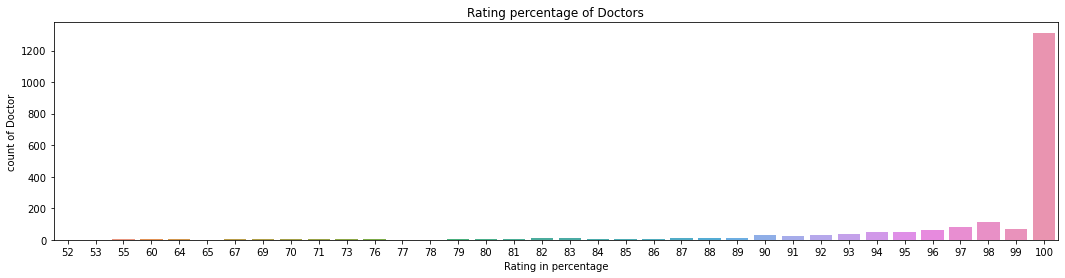

100    1313
98      112
97       84
99       68
96       65
94       51
95       47
93       34
92       29
90       29
91       26
88       13
83       11
89       11
87       11
82        9
85        8
84        7
80        7
71        7
86        6
73        5
67        5
76        4
70        4
60        4
81        3
55        3
79        2
69        2
64        2
78        1
77        1
65        1
53        1
52        1
Name: Rating, dtype: int64

In [38]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Rating',data=test)
plt.title('Rating percentage of Doctors')
plt.xlabel('Rating in percentage')
plt.ylabel('count of Doctor')
plt.show()
test['Rating'].value_counts()

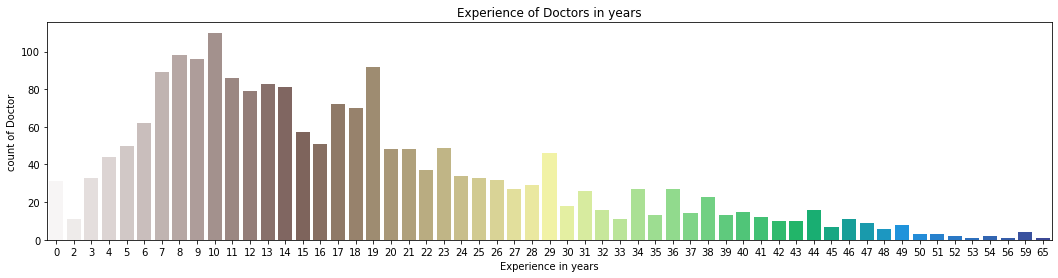

10    110
8      98
9      96
19     92
7      89
11     86
13     83
14     81
12     79
17     72
18     70
6      62
15     57
16     51
5      50
23     49
21     48
20     48
29     46
4      44
22     37
24     34
3      33
25     33
26     32
0      31
28     29
27     27
34     27
36     27
31     26
38     23
30     18
32     16
44     16
40     15
37     14
39     13
35     13
41     12
33     11
2      11
46     11
42     10
43     10
47      9
49      8
45      7
48      6
59      4
50      3
51      3
52      2
54      2
53      1
56      1
65      1
Name: Experience, dtype: int64

In [39]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Experience',data=test,palette='terrain_r')
plt.title('Experience of Doctors in years')
plt.xlabel('Experience in years')
plt.ylabel('count of Doctor')
plt.show()
test['Experience'].value_counts()

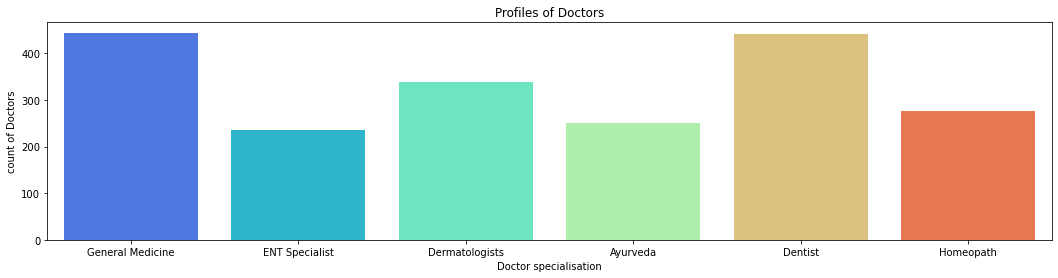

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [40]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Profile',data=test,palette='rainbow')
plt.title('Profiles of Doctors')
plt.xlabel('Doctor specialisation')
plt.ylabel('count of Doctors')
plt.show()
test['Profile'].value_counts()

# Bivariate analysis

# Rating vs Profile

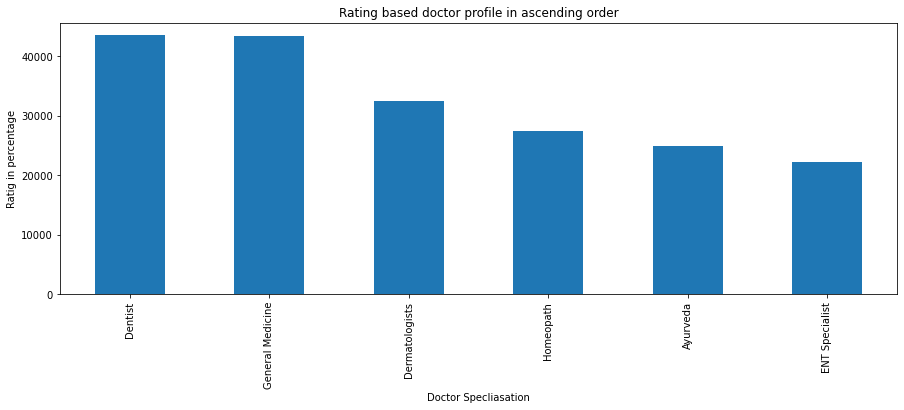

In [41]:
plt.subplots(figsize=(18,4))
test.groupby('Profile')['Rating'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Rating based doctor profile in ascending order')
plt.xlabel('Doctor Specliasation')
plt.ylabel('Rating in percentage')
plt.show()

# Experience vs Profile

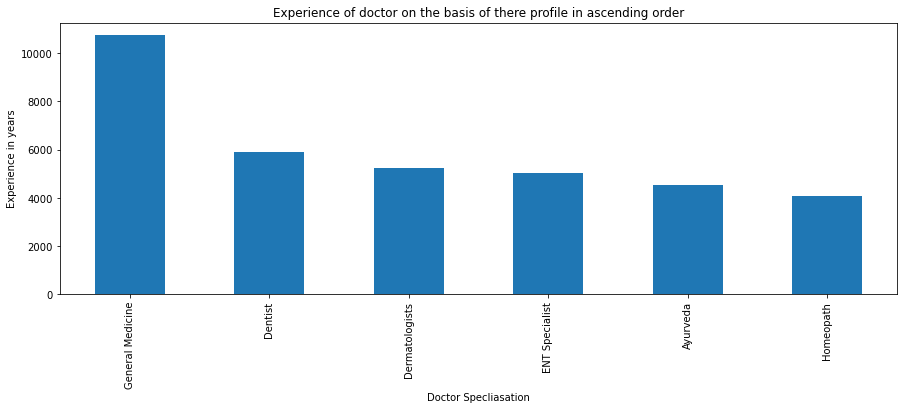

In [42]:
plt.subplots(figsize=(18,4))
test.groupby('Profile')['Experience'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Experience of doctor on the basis of there profile in ascending order')
plt.xlabel('Doctor Specliasation')
plt.ylabel('Experience in years')
plt.show()

# Thats all with test data lets start the process of building model.

# To check distribution of skewness

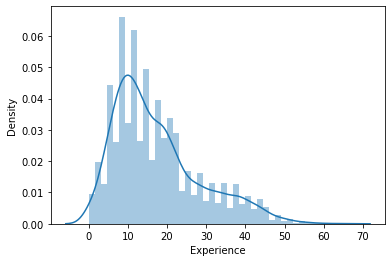

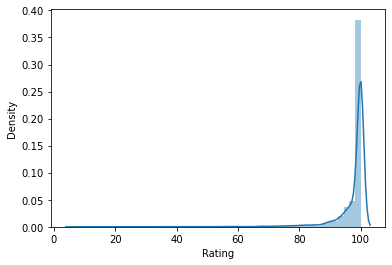

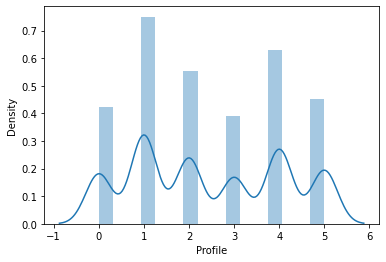

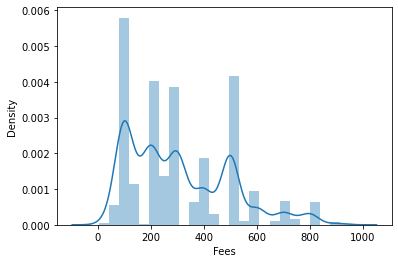

In [43]:
for i in train.columns:
    sns.distplot(train[i])
    plt.show()

In [44]:
# Now let check the skewness and try to remove the skewness.
train.skew()
#observation: we can oberve the data is skewed.

Experience    0.991089
Rating       -4.701646
Profile       0.108803
Fees          0.751870
dtype: float64

In [45]:
# lets apply log transformation and treat the skewed data
for col in train.columns:
    if train.skew().loc[col]>0.55:
        train[col]=np.sqrt(train[col])

In [46]:
train.skew()

Experience    0.082582
Rating       -4.701646
Profile       0.108803
Fees          0.245176
dtype: float64

# Removing Outliers

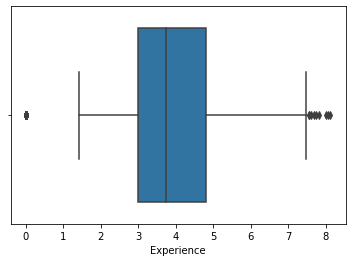

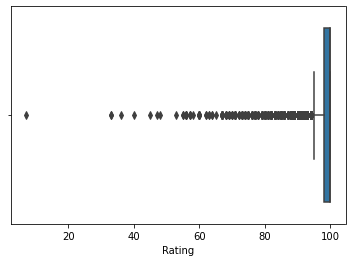

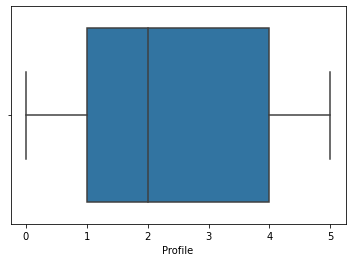

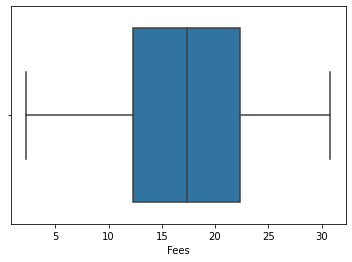

In [47]:
#lets plot the boxplot to identify the outliers.
for i in train.columns:
    sns.boxplot(train[i])
    plt.show()

In [48]:
#lets remove the outliers using zscore
from scipy.stats import zscore
z=abs(zscore(train))
print(train.shape)
new=train.loc[(z<3).all(axis=1)]
print(new.shape)
# we can observe the new zscore down below.

(5961, 4)
(5821, 4)


# Model Training

As we can observe in this data set , that we have to predict the consulatation Fees by taking target variable as Fees.


# Lets apply various regression to predict the Deaths.

In [49]:
# lets sepearate input output columns
df_x=new.drop(columns=['Fees']) # Input variable.
y=pd.DataFrame(new['Fees']) #Target Variable.

In [50]:
# lets scale the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()
# WE CAN NOTICE OUR DATA IS BEEN SCALED.

,Experience,Rating,Profile
0,0.733975,0.484987,1.541260
1,-0.329524,-0.083329,-1.454891
2,-0.673506,0.484987,0.342800
3,-0.329524,0.484987,-1.454891
4,0.417608,0.484987,-1.454891


In [51]:
#lets again check the skewness
x.skew()

Experience    0.086901
Rating       -2.697737
Profile       0.126566
dtype: float64

In [52]:
# let import diffrent model library
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
#import ensemble technique
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor



#importing error matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [53]:
#lets apply regression to datasets
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y): #Def is used such that we can call it later
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print('max r2 score correponding to',final_r_state,'is',max_r_score)
    print()
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
    print('Mean Squared error:',mean_squared_error(y_test,y_pred))
    print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('*******************************************************************')
    print()
    return final_r_state

In [54]:
model=[LinearRegression(),KNeighborsRegressor(),SVR(),GradientBoostingRegressor(),RandomForestRegressor(),Ridge(),ElasticNet(),AdaBoostRegressor()]
for m in model:
    print('----->>',m,'<<-----')
    r_state=maxr2_score(m,x,y)

----->> LinearRegression() <<-----

max r2 score correponding to 99 is 0.06260063261624194

Error:
Mean absolute error: 4.420063444711879
Mean Squared error: 28.22529508751013
Root Mean Squared error: 5.312748355372211
*******************************************************************

----->> KNeighborsRegressor() <<-----

max r2 score correponding to 99 is 0.04536374061198045

Error:
Mean absolute error: 4.34631442541824
Mean Squared error: 28.74430158584997
Root Mean Squared error: 5.361371241189139
*******************************************************************

----->> SVR() <<-----

max r2 score correponding to 99 is 0.16629536343432005

Error:
Mean absolute error: 4.06822761210823
Mean Squared error: 25.103024603662035
Root Mean Squared error: 5.010291868111281
*******************************************************************

----->> GradientBoostingRegressor() <<-----

max r2 score correponding to 77 is 0.17478597770445692

Error:
Mean absolute error: 4.095732951683561


In [55]:
#lets cross validate all the model uing FOR loop.
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),KNeighborsRegressor(),SVR(),GradientBoostingRegressor(),Ridge(),ElasticNet(),AdaBoostRegressor()]
for m in model:
    cvs=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Cross val score of',m,'is:')
    print('Cross val score is',cvs)
    print('Mean cross val score of',m,'is',cvs.mean())
    print('Standard deviation of',m,'is',cvs.std())
    print()
    print('*******************************************************************')

Cross val score of LinearRegression() is:
Cross val score is [0.02193288 0.04479331 0.05321    0.04383626 0.03230473 0.05249999
 0.03020776 0.04364052 0.05759042 0.04290911]
Mean cross val score of LinearRegression() is 0.042292499255463724
Standard deviation of LinearRegression() is 0.010623352804151739

*******************************************************************
Cross val score of KNeighborsRegressor() is:
Cross val score is [-0.09586826 -0.00802026  0.002324   -0.02346788 -0.0146777   0.0356623
  0.00278874 -0.06732292  0.0173299   0.00023098]
Mean cross val score of KNeighborsRegressor() is -0.015102109207409698
Standard deviation of KNeighborsRegressor() is 0.037226628352241053

*******************************************************************
Cross val score of SVR() is:
Cross val score is [0.11639553 0.10817707 0.14402998 0.1025982  0.1289636  0.15444599
 0.11108825 0.0720617  0.10132443 0.13887092]
Mean cross val score of SVR() is 0.11779556731957656
Standard deviatio

In [56]:
# lets check the best parameter using grid search cv.
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,100]} 
# use n_estimator with step of 50
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_


{'learning_rate': 0.01, 'n_estimators': 500}

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=77,test_size=0.20)
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("R2 Score for Ridge : ",r2_score(y_test,pred)*100)
print('Cross Validation Score for Ridge: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)
print()
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score for Ridge :  17.85735271444682
Cross Validation Score for Ridge:  14.15498738278727

Mean absolute error: 4.088227572626076
Mean Squared error: 24.62903877856138
Root Mean Squared Error : 4.962765235084305


In [58]:
#lets test the model
doc_cons_fee=gbr.predict(x)

AxesSubplot(0.125,0.125;0.775x0.755)


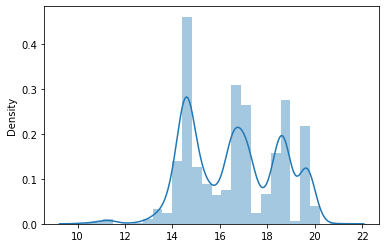

In [71]:
print(sns.distplot([doc_cons_fee]))

In [60]:
#lets save the predicted result to excel file.
ds=pd.DataFrame(doc_cons_fee)
ds.to_csv('doc_cons_fee.csv')

In [61]:
# lets Save the model
import joblib
joblib.dump(gbr,'doc_cons_fee.pkl')

['doc_cons_fee.pkl']